In [ ]:
import pandas as pd

# Replace 'your_dataset.csv' with the path to your CSV file
file_path = '/content/LastFinalFeatureExforallcolors.csv'

# Load the dataset
df = pd.read_csv(file_path, dtype={'image_name_helper': str})


# Print the number of columns in the dataset
print(f"Number of columns in the dataset: {len(df.columns)}")

# Print all column names
print("Columns in the dataset:")
for col in df.columns:
    print(col)


irrelevant_columns = [
    'ns_id', 'total_price', 'carat', 'price_per_carat', 'shape',
    'length', 'width', 'height', 'origin', 'treatment', 'image1', 'image2', 'image3'
]

# Drop irrelevant columns
df = df.drop(columns=irrelevant_columns)

# Print the number of remaining columns in the DataFrame
print(f"Number of columns after dropping irrelevant ones: {len(df.columns)}")

# Print the remaining columns
print("Remaining columns in the DataFrame:", df.columns.tolist())

X = df.drop(columns=['color', 'clarity', 'cut'])  # Features (input variables)
y = df[['color', 'clarity', 'cut']]  # Target variables

# Save the dataset with target variables separated into a new CSV file
df_target_separated = pd.concat([X, y], axis=1)  # Combine the features and target variables
df_target_separated.to_csv('separated_target_variables.csv', index=False)  # Save to a new CSV file


Number of columns in the dataset: 277
Columns in the dataset:
image_name_helper
ns_id
type
total_price
carat
price_per_carat
color
shape
length
width
height
clarity
cut
color_intensity
origin
treatment
image1
image2
image3
color_group
color_group_blue
color_group_blue-grey
color_group_blue-purple
color_group_brown-pink
color_group_green
color_group_padparadscha
color_group_pink
color_group_pink-purple
color_group_pink-red
color_group_purple
color_group_purple-red
color_group_red
color_group_red-orange
color_group_white
color_group_yellow
color_group_yellow-brown
color_group_yellow-green
color_group_yellow-orange
color_group_nan
color_intensity_score
color_category
clarity_eye clean
clarity_included
clarity_slightly included
clarity_very slightly included
clarity_score
clarity_group
cut_Asscher
cut_Brilliant
cut_Carving
cut_Emerald Cut
cut_Fancy Brilliant
cut_Fancy Cut
cut_French Cut
cut_Mixed Brilliant
cut_Modified Brilliant
cut_Princess Cut
cut_Radiant Cut
cut_Scissor Cut
cut_Step Cut

# Categorical and Numerical Features

In [ ]:
import pandas as pd

# Reading the CSV file with specified options to prevent DtypeWarning
df = pd.read_csv('separated_target_variables.csv', low_memory=False)


# Separate the target variables (color, clarity, cut) from the features
X = df.drop(columns=['color', 'clarity', 'cut'])  # Features (input variables)
y = df[['color', 'clarity', 'cut']]  # Target variables

# Count numerical features in the features DataFrame
numerical_features = X.select_dtypes(include=['number']).columns
num_numerical_features = len(numerical_features)

# Print the number of numerical features
print(f"Number of numerical features: {num_numerical_features}")

# Optionally display the list of numerical columns
print("List of numerical features:")
print(numerical_features)

# Identify categorical features
categorical_features = X.select_dtypes(include=['object']).columns

# Get the number of categorical features
num_categorical_features = len(categorical_features)

# Print the results
print("Number of categorical features:", num_categorical_features)
print("List of categorical features:")
print(categorical_features)

Number of numerical features: 254
List of numerical features:
Index(['color_group_blue', 'color_group_blue-grey', 'color_group_blue-purple',
       'color_group_brown-pink', 'color_group_green',
       'color_group_padparadscha', 'color_group_pink',
       'color_group_pink-purple', 'color_group_pink-red', 'color_group_purple',
       ...
       'R_Skewness', 'R_Kurtosis', 'G_Mean', 'G_StdDev', 'G_Skewness',
       'G_Kurtosis', 'B_Mean', 'B_StdDev', 'B_Skewness', 'B_Kurtosis'],
      dtype='object', length=254)
Number of categorical features: 7
List of categorical features:
Index(['image_name_helper', 'type', 'color_intensity', 'color_group',
       'color_category', 'clarity_group', 'cut_group'],
      dtype='object')


# Check Missing Values

In [ ]:
import pandas as pd

# Read the CSV file (replace with your actual file path)
df = pd.read_csv('separated_target_variables.csv', low_memory=False)

# Separate the features (X) and target variables (y)
X = df.drop(columns=['color', 'clarity', 'cut'])  # Features
y = df[['color', 'clarity', 'cut']]  # Target variables

# 1. Check for missing values in features (X)
missing_values_features = X.isnull().sum()

# Print missing values for features (X)
print("Missing values in features (X):")
for column, missing_count in missing_values_features.items():
    print(f"Column: {column}, Missing Values: {missing_count}")

# 2. Check for missing values in target variables (y)
missing_values_target = y.isnull().sum()

# Print missing values for target variables (y)
print("\nMissing values in target variables (y):")
for column, missing_count in missing_values_target.items():
    print(f"Column: {column}, Missing Values: {missing_count}")

Missing values in features (X):
Column: image_name_helper, Missing Values: 1
Column: type, Missing Values: 1
Column: color_intensity, Missing Values: 1
Column: color_group, Missing Values: 576
Column: color_group_blue, Missing Values: 1
Column: color_group_blue-grey, Missing Values: 1
Column: color_group_blue-purple, Missing Values: 1
Column: color_group_brown-pink, Missing Values: 1
Column: color_group_green, Missing Values: 1
Column: color_group_padparadscha, Missing Values: 1
Column: color_group_pink, Missing Values: 1
Column: color_group_pink-purple, Missing Values: 1
Column: color_group_pink-red, Missing Values: 1
Column: color_group_purple, Missing Values: 1
Column: color_group_purple-red, Missing Values: 1
Column: color_group_red, Missing Values: 1
Column: color_group_red-orange, Missing Values: 1
Column: color_group_white, Missing Values: 1
Column: color_group_yellow, Missing Values: 1
Column: color_group_yellow-brown, Missing Values: 1
Column: color_group_yellow-green, Missing

# Handle Missing Values

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer


data = pd.read_csv('separated_target_variables.csv', low_memory=False)


# Handling missing values in numerical columns by replacing them with the median
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Create an imputer for numerical columns (using median strategy)
numerical_imputer = SimpleImputer(strategy='median')
data[numerical_columns] = numerical_imputer.fit_transform(data[numerical_columns])

# Handling missing values in categorical columns by replacing them with the mode
categorical_columns = data.select_dtypes(include=['object']).columns

# Create an imputer for categorical columns (using most frequent strategy)
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])

# Optional: Check for any remaining missing values
missing_values = data.isnull().sum()

print("Missing values after imputation:\n", missing_values)

# Save the cleaned data to a new file if needed
data.to_csv('cleaned_dataset.csv', index=False)

Missing values after imputation:
 image_name_helper    0
type                 0
color_intensity      0
color_group          0
color_group_blue     0
                    ..
B_Skewness           0
B_Kurtosis           0
color                0
clarity              0
cut                  0
Length: 264, dtype: int64


# Handle Imbalanced Dataset

In [ ]:
pip install imbalanced-learn

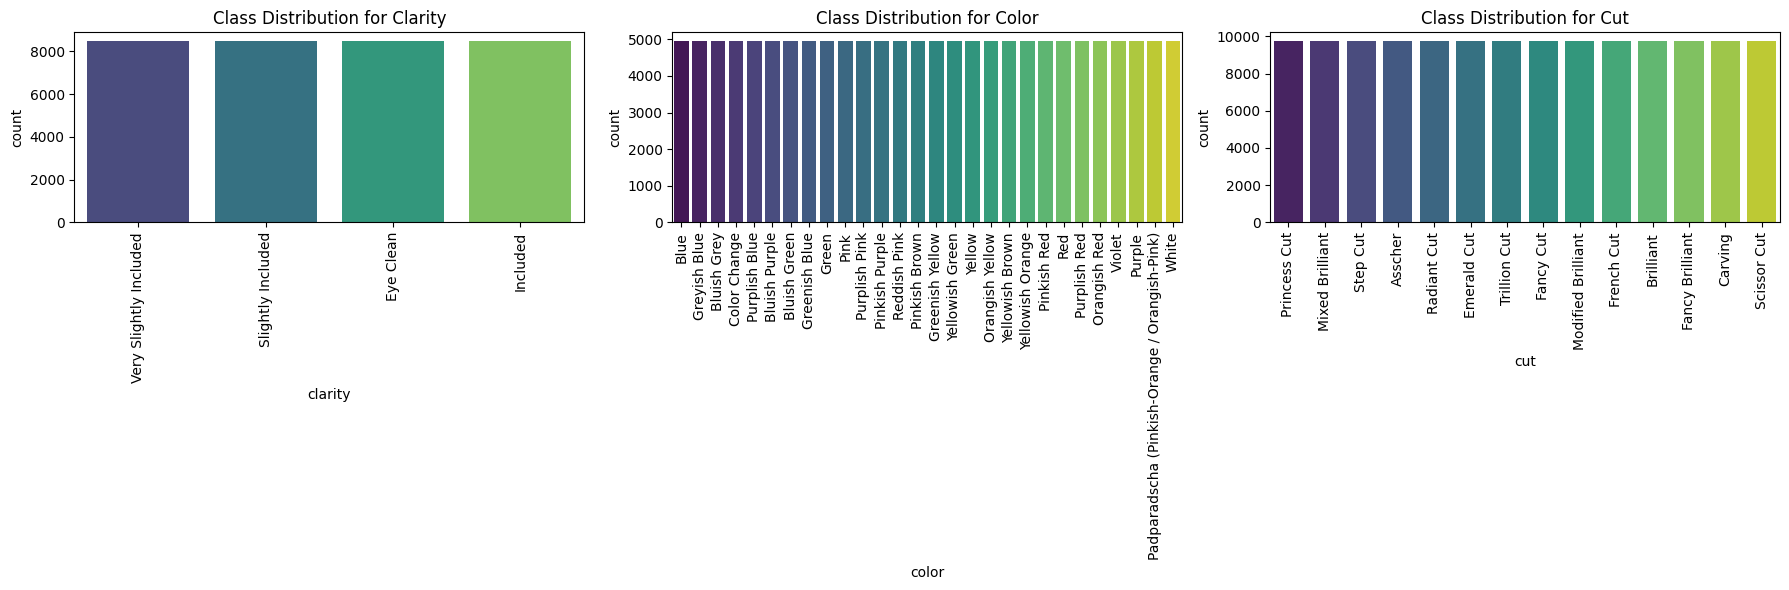

Dataset after resampling has been saved as 'resampled_dataset.csv'


In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns

# Read the preprocessed dataset
data = pd.read_csv('cleaned_dataset.csv', low_memory=False)

# Separate the features (X) and target variables (y)
X = data.drop(columns=['clarity', 'color', 'cut'])  # Features (without the target variables)
y = data[['clarity', 'color', 'cut']]  # Target variables

# Step 1: Handle class imbalance in target columns using RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the target variables for clarity, color, and cut
X_resampled_clarity, y_resampled_clarity = ros.fit_resample(X, y['clarity'])
X_resampled_color, y_resampled_color = ros.fit_resample(X, y['color'])
X_resampled_cut, y_resampled_cut = ros.fit_resample(X, y['cut'])

# Combine resampled target variables into one DataFrame
y_resampled = pd.DataFrame({
    'clarity': y_resampled_clarity,
    'color': y_resampled_color,
    'cut': y_resampled_cut
})

# Step 2: Plot class distributions for 'clarity', 'color', and 'cut' side by side
def plot_class_distribution_side_by_side(y1, y2, y3):
    plt.figure(figsize=(18, 6))  # Set a large figure size for side-by-side plots

    # Plot clarity distribution
    plt.subplot(1, 3, 1)  # (rows, columns, plot number)
    sns.countplot(x=y1, palette="viridis", hue=y1)
    plt.title("Class Distribution for Clarity")
    plt.xticks(rotation=90)

    # Plot color distribution
    plt.subplot(1, 3, 2)
    sns.countplot(x=y2, palette="viridis", hue=y2)
    plt.title("Class Distribution for Color")
    plt.xticks(rotation=90)

    # Plot cut distribution
    plt.subplot(1, 3, 3)
    sns.countplot(x=y3, palette="viridis", hue=y3)
    plt.title("Class Distribution for Cut")
    plt.xticks(rotation=90)

    plt.tight_layout()  # Adjust layout for better spacing between plots
    plt.show()

# Plot distributions for resampled 'clarity', 'color', and 'cut' side by side
plot_class_distribution_side_by_side(y_resampled_clarity, y_resampled_color, y_resampled_cut)

# Step 3: Save the resampled dataset as a CSV file without scaling
# Combine the resampled features and target variables using pd.concat
X_resampled = pd.concat([X_resampled_clarity, y_resampled['clarity']], axis=1)
X_resampled = pd.concat([X_resampled, y_resampled['color']], axis=1)
X_resampled = pd.concat([X_resampled, y_resampled['cut']], axis=1)

# Save the final resampled dataset
X_resampled.to_csv('resampled_dataset.csv', index=False)

print("Dataset after resampling has been saved as 'resampled_dataset.csv'")


# Encode Categorical and Apply Label Encode

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import warnings

# Step 1: Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

# Step 2: Read the resampled CSV file (after RandomOverSampler)
data = pd.read_csv('resampled_dataset.csv', low_memory=False)  # Replace with your actual dataset path

# Step 3: Handle missing values for features before encoding
# Select columns with missing values
missing_columns = data.columns[data.isnull().any()]

# Impute missing values for numerical columns (using the mean)
numerical_cols = data[missing_columns].select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Impute missing values for categorical columns (using the mode)
categorical_cols = data[missing_columns].select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Check for missing values after imputation
missing_values_after_imputation = data.isnull().sum()
print("Missing values after imputation (before encoding):\n", missing_values_after_imputation)

# Step 4: Separate the features (X) and target variables (y)
X = data.drop(columns=['clarity', 'color', 'cut'])  # Assuming 'clarity', 'color', 'cut' are the target columns
y = data[['clarity', 'color', 'cut']]  # The target variables

# Step 5: Handle missing values for target columns (impute with 'Unknown')
y.loc[:, 'clarity'] = y['clarity'].fillna('Unknown')
y.loc[:, 'color'] = y['color'].fillna('Unknown')
y.loc[:, 'cut'] = y['cut'].fillna('Unknown')

# Step 6: Encode categorical columns in X (features) using LabelEncoder
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

# Apply LabelEncoder to categorical columns in the feature set (X)
for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column])

# Step 7: Encode the target variables (clarity, color, cut) using LabelEncoder
label_encoder_clarity = LabelEncoder()
label_encoder_color = LabelEncoder()
label_encoder_cut = LabelEncoder()

# Fit the encoders on the target variables
label_encoder_clarity.fit(y['clarity'])
label_encoder_color.fit(y['color'])
label_encoder_cut.fit(y['cut'])

# Use .loc to avoid SettingWithCopyWarning
y.loc[:, 'clarity'] = label_encoder_clarity.transform(y['clarity'])
y.loc[:, 'color'] = label_encoder_color.transform(y['color'])
y.loc[:, 'cut'] = label_encoder_cut.transform(y['cut'])

# Check if there are any missing values in the encoded data (features and target)
missing_values_after_encoding = pd.concat([X, y], axis=1).isnull().sum()
print("\nMissing values after encoding:\n", missing_values_after_encoding)

# Step 8: Handle missing values after encoding (if any)
# In case any new missing values appeared during encoding, we can handle them as follows:
# For numerical columns (in features):
numerical_cols_encoded = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_cols_encoded] = X[numerical_cols_encoded].fillna(X[numerical_cols_encoded].mean())

# For categorical columns (in features and target variables):
categorical_cols_encoded = X.select_dtypes(include=['object']).columns
for col in categorical_cols_encoded:
    X[col] = X[col].fillna(X[col].mode()[0])

# Handle missing values in target columns after encoding (if any)
y.loc[:, 'clarity'] = y['clarity'].fillna(label_encoder_clarity.classes_[0])
y.loc[:, 'color'] = y['color'].fillna(label_encoder_color.classes_[0])
y.loc[:, 'cut'] = y['cut'].fillna(label_encoder_cut.classes_[0])

# Step 9: Combine the encoded features and target variables back into a single DataFrame
encoded_data = pd.concat([X, y], axis=1)

# Step 10: Save the encoded data to a new CSV file
encoded_data.to_csv('encoded_resampled_dataset.csv', index=False)

print("\nEncoded data saved to 'encoded_resampled_dataset.csv'")


Missing values after imputation (before encoding):
 image_name_helper    0
type                 0
color_intensity      0
color_group          0
color_group_blue     0
                    ..
B_Skewness           0
B_Kurtosis           0
clarity              0
color                0
cut                  0
Length: 264, dtype: int64

Missing values after encoding:
 image_name_helper    0
type                 0
color_intensity      0
color_group          0
color_group_blue     0
                    ..
B_Skewness           0
B_Kurtosis           0
clarity              0
color                0
cut                  0
Length: 264, dtype: int64

Encoded data saved to 'encoded_resampled_dataset.csv'


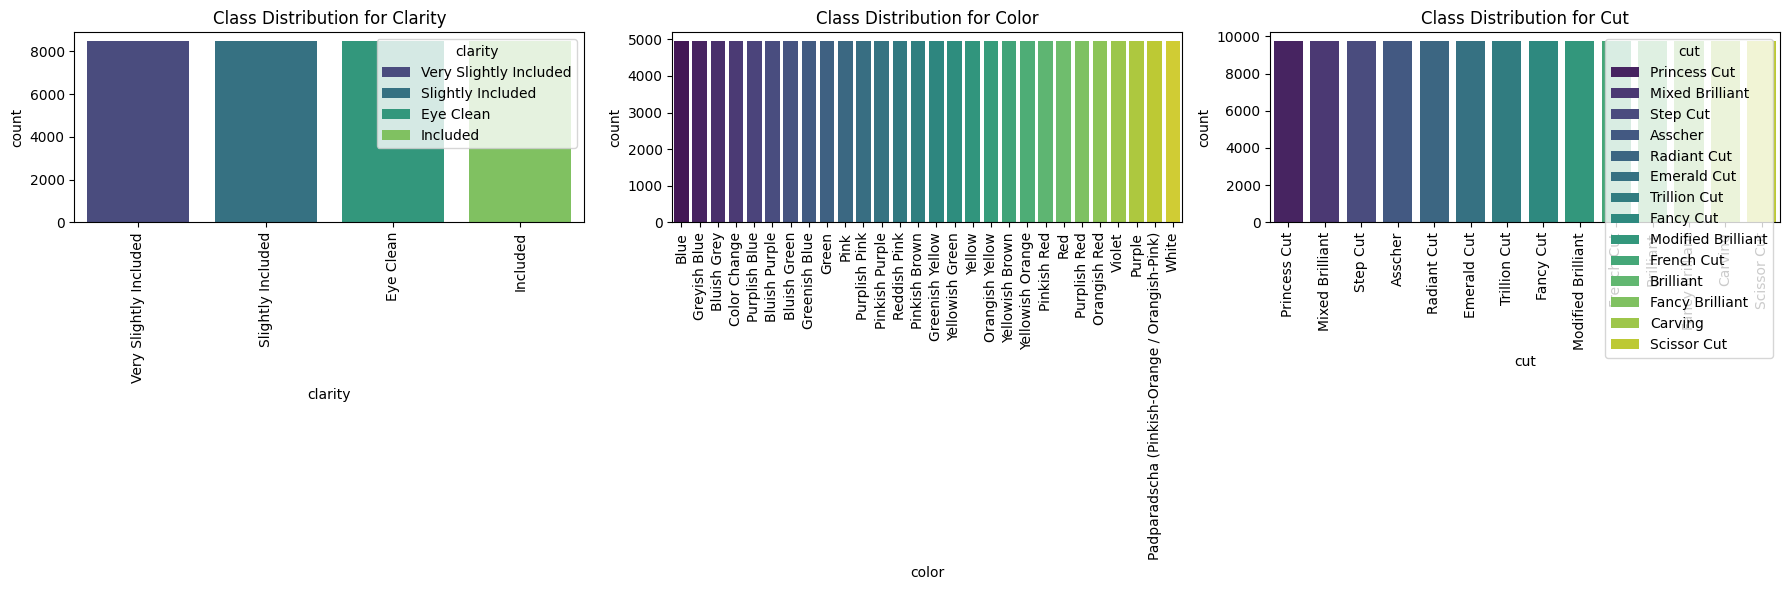


Encoded columns (should be numerical now): Index(['image_name_helper', 'type', 'color_intensity', 'color_group',
       'color_group_blue', 'color_group_blue-grey', 'color_group_blue-purple',
       'color_group_brown-pink', 'color_group_green',
       'color_group_padparadscha',
       ...
       'R_Skewness', 'R_Kurtosis', 'G_Mean', 'G_StdDev', 'G_Skewness',
       'G_Kurtosis', 'B_Mean', 'B_StdDev', 'B_Skewness', 'B_Kurtosis'],
      dtype='object', length=261)

Unique values in encoded target variable 'clarity': [3 2 0 1]
Unique values in encoded target variable 'color': [0 8 2 4 17 3 1 6 5 12 18 14 21 13 7 26 24 10 25 27 15 20 19 9 22 16 11 23]
Unique values in encoded target variable 'cut': [9 7 12 0 10 3 13 5 8 6 1 4 2 11]

Dataset shape after processing:  (138404, 264)

First few rows of the processed dataset:
    image_name_helper  type  color_intensity  color_group  color_group_blue  \
0                  0     0               10            0               1.0   
1           

In [ ]:


# Step 1: Check class distribution for target variables after resampling (clarity, color, and cut)
def plot_class_distribution(y1, y2, y3, target_names):
    plt.figure(figsize=(18, 6))

    # Plot clarity distribution
    plt.subplot(1, 3, 1)
    sns.countplot(x=y1, palette="viridis", hue=y1)
    plt.title(f"Class Distribution for {target_names[0]}")
    plt.xticks(rotation=90)

    # Plot color distribution
    plt.subplot(1, 3, 2)
    sns.countplot(x=y2, palette="viridis", hue=y2)
    plt.title(f"Class Distribution for {target_names[1]}")
    plt.xticks(rotation=90)

    # Plot cut distribution
    plt.subplot(1, 3, 3)
    sns.countplot(x=y3, palette="viridis", hue=y3)
    plt.title(f"Class Distribution for {target_names[2]}")
    plt.xticks(rotation=90)

    plt.tight_layout()  # Adjust layout for better spacing between plots
    plt.show()

# Call the function to visualize class distributions
plot_class_distribution(y_resampled['clarity'], y_resampled['color'], y_resampled['cut'], target_names=['Clarity', 'Color', 'Cut'])

# Step 2: Check that categorical columns in X are correctly encoded
encoded_columns = X.select_dtypes(include=['int64', 'float64']).columns
print("\nEncoded columns (should be numerical now):", encoded_columns)

# Check the unique values in the target variables after encoding
print("\nUnique values in encoded target variable 'clarity':", y['clarity'].unique())
print("Unique values in encoded target variable 'color':", y['color'].unique())
print("Unique values in encoded target variable 'cut':", y['cut'].unique())



# Step 3: Check the final dataset structure
print("\nDataset shape after processing: ", pd.concat([X, y], axis=1).shape)
print("\nFirst few rows of the processed dataset:\n", pd.concat([X, y], axis=1).head())

